In [82]:
import pandas as pd # load and manipulate the data and for One- Hot Encoding
import numpy as np #calculate mean and standard deviation
import xgboost as xgb #xgboost stuff
from sklearn.model_selection import train_test_split #split data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
#from sklearn.metrics import plot_confusion_matrix #draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [83]:
df=pd.read_csv('Assignment_Train.csv')
tt1=pd.read_csv('Assignment_Test.csv')

In [84]:
df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07-04-2022,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [85]:
tt1.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,1.840000e+18,105615,07-12-2022,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium,NaN
1,1.840000e+18,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low,NaN
2,1.490000e+18,74152,07-07-2022,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium,NaN
3,5.560000e+17,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low,NaN
4,1.010000e+18,113037,07-08-2022,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low,NaN


In [86]:
tt=tt1.drop('UID',axis=1).copy()

In [87]:
df.drop(['DEALER ID','APPLICATION LOGIN DATE','HDB BRANCH NAME','HDB BRANCH STATE','FIRST NAME','MIDDLE NAME','LAST NAME','mobile','DEALER NAME','ASSET MODEL NO','Personal Email Address','DOB','EMPLOYER NAME','upi_name',],
        axis=1,inplace=True)
df.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET CTG,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,MARITAL STATUS,GENDER,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,NO,726,True,95041.0,MCEXA,85000,HONDA MOTORS,SHINE DRUM BSVI,Married,Male,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,NO,NaN,True,NaN,NaN,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,NaN,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,NO,737,True,119436.0,SCEXA,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,NO,713,True,87000.0,MCECA,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,NO,669,True,NaN,NaN,70000,HONDA MOTORS,DIO STD BSVI,NaN,Male,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [88]:
tt.drop(['DEALER ID','APPLICATION LOGIN DATE','HDB BRANCH NAME','HDB BRANCH STATE','FIRST NAME','MIDDLE NAME','LAST NAME','mobile','DEALER NAME','ASSET MODEL NO','Personal Email Address','DOB','EMPLOYER NAME','upi_name',],
        axis=1,inplace=True)
tt.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET CTG,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,MARITAL STATUS,GENDER,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,NO,757,True,95352.0,SCECA,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,Married,Male,...,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium,NaN
1,NO,750,True,75371.0,MOECA,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,Married,Male,...,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low,NaN
2,NO,710,True,94983.0,SCECA,93000,HONDA MOTORS,ACTIVA 6G DLX,Single,Male,...,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium,NaN
3,NO,695,True,NaN,NaN,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,NaN,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low,NaN
4,NO,NaN,True,90277.0,MCECA,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,Single,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low,NaN


In [89]:
print("Lenght of data: ", len(df))
print('-----------------')
print('df info', df.info())

Lenght of data:  10000
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AADHAR VERIFIED                      10000 non-null  object 
 1   Cibil Score                          5703 non-null   object 
 2   MOBILE VERIFICATION                  10000 non-null  bool   
 3   TOTAL ASSET COST                     4892 non-null   float64
 4   ASSET CTG                            4892 non-null   object 
 5   APPLIED AMOUNT                       10000 non-null  int64  
 6   PRIMARY ASSET MAKE                   10000 non-null  object 
 7   Primary Asset Model No               10000 non-null  object 
 8   MARITAL STATUS                       5106 non-null   object 
 9   GENDER                               10000 non-null  object 
 10  AGE                                  10000 non-null  i

In [90]:
print("Lenght of data: ", len(tt))
print('-----------------')
print('tt info', tt.info())

Lenght of data:  2000
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AADHAR VERIFIED                      2000 non-null   object 
 1   Cibil Score                          1158 non-null   object 
 2   MOBILE VERIFICATION                  2000 non-null   bool   
 3   TOTAL ASSET COST                     978 non-null    float64
 4   ASSET CTG                            978 non-null    object 
 5   APPLIED AMOUNT                       2000 non-null   int64  
 6   PRIMARY ASSET MAKE                   2000 non-null   object 
 7   Primary Asset Model No               2000 non-null   object 
 8   MARITAL STATUS                       1019 non-null   object 
 9   GENDER                               2000 non-null   object 
 10  AGE                                  2000 non-null   int

In [91]:
df.describe()

,TOTAL ASSET COST,APPLIED AMOUNT,AGE,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,...,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore
count,4892.000000,1.000000e+04,10000.000000,1.0,8084.000000,8052.000000,8168.000000,8224.00000,8225.000000,3370.000000,...,8243.000000,1.0,8221.000000,8215.000000,8057.000000,1573.000000,9.0,8218.000000,9996.000000,9996.000000
mean,97612.518397,9.179673e+04,31.796100,0.0,0.486517,0.149652,0.748408,0.06323,0.986991,0.913353,...,0.820090,0.0,0.017516,0.147657,0.250838,0.854418,0.0,0.000608,1652.937975,55.645558
std,16745.027041,2.700018e+04,11.202075,NaN,0.499849,0.356752,0.433954,0.24339,0.113320,0.281359,...,0.384136,NaN,0.131192,0.354781,0.433522,0.352799,0.0,0.024660,984.114248,42.100616
min,51873.000000,1.040000e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,-1.000000
25%,88425.500000,8.000000e+04,25.000000,0.0,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,809.000000,-1.000000
50%,94400.000000,9.000000e+04,31.000000,0.0,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1988.000000,73.571429
75%,103499.250000,9.900000e+04,39.000000,0.0,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,...,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,2031.000000,96.000000
max,241116.000000,1.420000e+06,79.000000,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,6311.000000,100.000000


In [92]:
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace('.','_')
df.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_shaadi,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application_Status
0,NO,726,True,95041.0,MCEXA,85000,HONDA MOTORS,SHINE DRUM BSVI,Married,Male,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,NO,NaN,True,NaN,NaN,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,NaN,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,NO,737,True,119436.0,SCEXA,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,NO,713,True,87000.0,MCECA,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,NO,669,True,NaN,NaN,70000,HONDA MOTORS,DIO STD BSVI,NaN,Male,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [93]:
tt.columns=tt.columns.str.replace(' ','_')
tt.columns=tt.columns.str.replace('.','_')
tt.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_shaadi,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application_Status
0,NO,757,True,95352.0,SCECA,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,Married,Male,...,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium,NaN
1,NO,750,True,75371.0,MOECA,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,Married,Male,...,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low,NaN
2,NO,710,True,94983.0,SCECA,93000,HONDA MOTORS,ACTIVA 6G DLX,Single,Male,...,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium,NaN
3,NO,695,True,NaN,NaN,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,NaN,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low,NaN
4,NO,NaN,True,90277.0,MCECA,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,Single,Male,...,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low,NaN


In [94]:
print('Null values in data:\n' , df.isnull().sum())

Null values in data:
 AADHAR_VERIFIED                           0
Cibil_Score                            4297
MOBILE_VERIFICATION                       0
TOTAL_ASSET_COST                       5108
ASSET_CTG                              5108
APPLIED_AMOUNT                            0
PRIMARY_ASSET_MAKE                        0
Primary_Asset_Model_No                    0
MARITAL_STATUS                         4894
GENDER                                    0
AGE                                       0
ADDRESS_TYPE                           3312
EMPLOY_CONSTITUTION                    4998
EMPLOYER_TYPE                          4998
Pan_Name                               1053
name                                      0
vpa                                    2787
Phone_Social_Premium_a23games          9999
Phone_Social_Premium_amazon            1916
Phone_Social_Premium_byjus             1948
Phone_Social_Premium_flipkart          1832
Phone_Social_Premium_housing           1776
Phone_Soci

In [95]:
print('Null values in data:\n' , tt.isnull().sum())

Null values in data:
 AADHAR_VERIFIED                           0
Cibil_Score                             842
MOBILE_VERIFICATION                       0
TOTAL_ASSET_COST                       1022
ASSET_CTG                              1022
APPLIED_AMOUNT                            0
PRIMARY_ASSET_MAKE                        0
Primary_Asset_Model_No                    0
MARITAL_STATUS                          981
GENDER                                    0
AGE                                       0
ADDRESS_TYPE                            635
EMPLOY_CONSTITUTION                     994
EMPLOYER_TYPE                           994
Pan_Name                                209
name                                      0
vpa                                     554
Phone_Social_Premium_a23games          2000
Phone_Social_Premium_amazon             117
Phone_Social_Premium_byjus               23
Phone_Social_Premium_flipkart            45
Phone_Social_Premium_housing             23
Phone_Soci

In [96]:
df.duplicated().sum()

11

In [97]:
tt.duplicated().sum()

0

In [98]:
df[df.isnull()]=0

In [99]:
tt[tt.isnull()]=0

In [100]:
print('Null values in data:\n' , df.isnull().sum())

Null values in data:
 AADHAR_VERIFIED                        0
Cibil_Score                            0
MOBILE_VERIFICATION                    0
TOTAL_ASSET_COST                       0
ASSET_CTG                              0
APPLIED_AMOUNT                         0
PRIMARY_ASSET_MAKE                     0
Primary_Asset_Model_No                 0
MARITAL_STATUS                         0
GENDER                                 0
AGE                                    0
ADDRESS_TYPE                           0
EMPLOY_CONSTITUTION                    0
EMPLOYER_TYPE                          0
Pan_Name                               0
name                                   0
vpa                                    0
Phone_Social_Premium_a23games          0
Phone_Social_Premium_amazon            0
Phone_Social_Premium_byjus             0
Phone_Social_Premium_flipkart          0
Phone_Social_Premium_housing           0
Phone_Social_Premium_indiamart         0
Phone_Social_Premium_instagram     

In [101]:
print('Null values in data:\n' , tt.isnull().sum())

Null values in data:
 AADHAR_VERIFIED                        0
Cibil_Score                            0
MOBILE_VERIFICATION                    0
TOTAL_ASSET_COST                       0
ASSET_CTG                              0
APPLIED_AMOUNT                         0
PRIMARY_ASSET_MAKE                     0
Primary_Asset_Model_No                 0
MARITAL_STATUS                         0
GENDER                                 0
AGE                                    0
ADDRESS_TYPE                           0
EMPLOY_CONSTITUTION                    0
EMPLOYER_TYPE                          0
Pan_Name                               0
name                                   0
vpa                                    0
Phone_Social_Premium_a23games          0
Phone_Social_Premium_amazon            0
Phone_Social_Premium_byjus             0
Phone_Social_Premium_flipkart          0
Phone_Social_Premium_housing           0
Phone_Social_Premium_indiamart         0
Phone_Social_Premium_instagram     

In [102]:
df.dtypes

,0
AADHAR_VERIFIED,object
Cibil_Score,object
MOBILE_VERIFICATION,bool
TOTAL_ASSET_COST,float64
ASSET_CTG,object
APPLIED_AMOUNT,int64
PRIMARY_ASSET_MAKE,object
Primary_Asset_Model_No,object
MARITAL_STATUS,object
GENDER,object


In [103]:
tt.dtypes

,0
AADHAR_VERIFIED,object
Cibil_Score,object
MOBILE_VERIFICATION,bool
TOTAL_ASSET_COST,float64
ASSET_CTG,object
APPLIED_AMOUNT,int64
PRIMARY_ASSET_MAKE,object
Primary_Asset_Model_No,object
MARITAL_STATUS,object
GENDER,object


In [104]:


# Replace 'NO RESPONSE' with a placeholder like NaN
df['Cibil_Score'] = df['Cibil_Score'].replace(['NO RESPONSE', '-'], 0)

# Now convert the column to integer type, handling missing values
df['Cibil_Score'] = df['Cibil_Score'].astype(float).astype('Int64')

In [105]:
# Replace 'NO RESPONSE' with a placeholder like NaN
tt['Cibil_Score'] = tt['Cibil_Score'].replace(['NO RESPONSE', '-'], 0)

# Now convert the column to integer type, handling missing values
tt['Cibil_Score'] = tt['Cibil_Score'].astype(float).astype('Int64')

In [106]:
df['Correct_name'] = (df['Pan_Name'] == df['name']).astype(int)
df.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application_Status,Correct_name
0,NO,726,True,95041.0,MCEXA,85000,HONDA MOTORS,SHINE DRUM BSVI,Married,Male,...,0.0,1.0,0.0,0.0,0.0,5324.0,67.222222,High,APPROVED,0
1,NO,0,True,0.0,0,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,0,Male,...,0.0,0.0,0.0,0.0,0.0,1998.0,100.000000,High,APPROVED,1
2,NO,737,True,119436.0,SCEXA,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,APPROVED,1
3,NO,713,True,87000.0,MCECA,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,...,0.0,1.0,0.0,0.0,0.0,1998.0,72.777778,High,APPROVED,0
4,NO,669,True,0.0,0,70000,HONDA MOTORS,DIO STD BSVI,0,Male,...,0.0,1.0,0.0,0.0,0.0,1998.0,68.095238,High,DECLINED,0


In [107]:
tt['Correct_name'] = (tt['Pan_Name'] == tt['name']).astype(int)
tt.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application_Status,Correct_name
0,NO,757,True,95352.0,SCECA,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,Married,Male,...,0.0,0.0,0.0,0.0,0.0,676,100.0,Medium,0.0,0
1,NO,750,True,75371.0,MOECA,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,Married,Male,...,0.0,0.0,0.0,0.0,0.0,897,-1.0,Low,0.0,1
2,NO,710,True,94983.0,SCECA,93000,HONDA MOTORS,ACTIVA 6G DLX,Single,Male,...,1.0,0.0,1.0,0.0,0.0,839,100.0,Medium,0.0,1
3,NO,695,True,0.0,0,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,0,Male,...,0.0,0.0,0.0,0.0,0.0,2050,-1.0,Low,0.0,0
4,NO,0,True,90277.0,MCECA,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,Single,Male,...,0.0,0.0,0.0,0.0,0.0,-1,-1.0,Very Low,0.0,0


In [108]:
df.dtypes

,0
AADHAR_VERIFIED,object
Cibil_Score,Int64
MOBILE_VERIFICATION,bool
TOTAL_ASSET_COST,float64
ASSET_CTG,object
APPLIED_AMOUNT,int64
PRIMARY_ASSET_MAKE,object
Primary_Asset_Model_No,object
MARITAL_STATUS,object
GENDER,object


In [109]:
df.drop(['Pan_Name','name'],
        axis=1,inplace=True)
df.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application_Status,Correct_name
0,NO,726,True,95041.0,MCEXA,85000,HONDA MOTORS,SHINE DRUM BSVI,Married,Male,...,0.0,1.0,0.0,0.0,0.0,5324.0,67.222222,High,APPROVED,0
1,NO,0,True,0.0,0,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,0,Male,...,0.0,0.0,0.0,0.0,0.0,1998.0,100.000000,High,APPROVED,1
2,NO,737,True,119436.0,SCEXA,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,APPROVED,1
3,NO,713,True,87000.0,MCECA,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,...,0.0,1.0,0.0,0.0,0.0,1998.0,72.777778,High,APPROVED,0
4,NO,669,True,0.0,0,70000,HONDA MOTORS,DIO STD BSVI,0,Male,...,0.0,1.0,0.0,0.0,0.0,1998.0,68.095238,High,DECLINED,0


In [110]:
tt.drop(['Pan_Name','name'],
        axis=1,inplace=True)
tt.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application_Status,Correct_name
0,NO,757,True,95352.0,SCECA,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,Married,Male,...,0.0,0.0,0.0,0.0,0.0,676,100.0,Medium,0.0,0
1,NO,750,True,75371.0,MOECA,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,Married,Male,...,0.0,0.0,0.0,0.0,0.0,897,-1.0,Low,0.0,1
2,NO,710,True,94983.0,SCECA,93000,HONDA MOTORS,ACTIVA 6G DLX,Single,Male,...,1.0,0.0,1.0,0.0,0.0,839,100.0,Medium,0.0,1
3,NO,695,True,0.0,0,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,0,Male,...,0.0,0.0,0.0,0.0,0.0,2050,-1.0,Low,0.0,0
4,NO,0,True,90277.0,MCECA,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,Single,Male,...,0.0,0.0,0.0,0.0,0.0,-1,-1.0,Very Low,0.0,0


In [111]:
X=df.drop('Application_Status',axis=1).copy()
X.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_shaadi,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Correct_name
0,NO,726,True,95041.0,MCEXA,85000,HONDA MOTORS,SHINE DRUM BSVI,Married,Male,...,0.0,0.0,1.0,0.0,0.0,0.0,5324.0,67.222222,High,0
1,NO,0,True,0.0,0,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,0,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,1998.0,100.000000,High,1
2,NO,737,True,119436.0,SCEXA,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,1
3,NO,713,True,87000.0,MCECA,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,...,0.0,0.0,1.0,0.0,0.0,0.0,1998.0,72.777778,High,0
4,NO,669,True,0.0,0,70000,HONDA MOTORS,DIO STD BSVI,0,Male,...,0.0,0.0,1.0,0.0,0.0,0.0,1998.0,68.095238,High,0


In [112]:
X_test=tt.drop('Application_Status',axis=1).copy()
X_test.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_shaadi,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Correct_name
0,NO,757,True,95352.0,SCECA,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,Married,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,676,100.0,Medium,0
1,NO,750,True,75371.0,MOECA,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,Married,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,897,-1.0,Low,1
2,NO,710,True,94983.0,SCECA,93000,HONDA MOTORS,ACTIVA 6G DLX,Single,Male,...,0.0,1.0,0.0,1.0,0.0,0.0,839,100.0,Medium,1
3,NO,695,True,0.0,0,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,0,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,2050,-1.0,Low,0
4,NO,0,True,90277.0,MCECA,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,Single,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,Very Low,0


In [113]:
X.dtypes

,0
AADHAR_VERIFIED,object
Cibil_Score,Int64
MOBILE_VERIFICATION,bool
TOTAL_ASSET_COST,float64
ASSET_CTG,object
APPLIED_AMOUNT,int64
PRIMARY_ASSET_MAKE,object
Primary_Asset_Model_No,object
MARITAL_STATUS,object
GENDER,object


In [114]:
X_test.dtypes

,0
AADHAR_VERIFIED,object
Cibil_Score,Int64
MOBILE_VERIFICATION,bool
TOTAL_ASSET_COST,float64
ASSET_CTG,object
APPLIED_AMOUNT,int64
PRIMARY_ASSET_MAKE,object
Primary_Asset_Model_No,object
MARITAL_STATUS,object
GENDER,object


In [115]:
X_encoded=pd.get_dummies(X,columns=['AADHAR_VERIFIED',
                                    'ASSET_CTG',
                                    'PRIMARY_ASSET_MAKE',
                                    'Primary_Asset_Model_No',
                                    'MARITAL_STATUS',
                                    'GENDER',
                                    'ADDRESS_TYPE',
                                    'EMPLOY_CONSTITUTION',
                                    'EMPLOYER_TYPE',
                                    'vpa',
                                    'phone_phoneFootprintStrengthOverall'
                                     ])
X_encoded.head()

,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,APPLIED_AMOUNT,AGE,Phone_Social_Premium_a23games,Phone_Social_Premium_amazon,Phone_Social_Premium_byjus,Phone_Social_Premium_flipkart,Phone_Social_Premium_housing,...,vpa_WAICICI,vpa_YAPL,vpa_YBL,vpa_YESG,phone_phoneFootprintStrengthOverall_0,phone_phoneFootprintStrengthOverall_High,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,726,True,95041.0,85000,44,0.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,False,False
1,0,True,0.0,90000,25,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,True,False,False,False,False
2,737,True,119436.0,75000,22,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,713,True,87000.0,78500,24,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,True,False,False,False,False
4,669,True,0.0,70000,33,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [116]:
X_test_encoded=pd.get_dummies(X_test,columns=['AADHAR_VERIFIED',
                                    'ASSET_CTG',
                                    'PRIMARY_ASSET_MAKE',
                                    'Primary_Asset_Model_No',
                                    'MARITAL_STATUS',
                                    'GENDER',
                                    'ADDRESS_TYPE',
                                    'EMPLOY_CONSTITUTION',
                                    'EMPLOYER_TYPE',
                                    'vpa',
                                    'phone_phoneFootprintStrengthOverall'
                                     ])
X_test_encoded.head()

,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,APPLIED_AMOUNT,AGE,Phone_Social_Premium_a23games,Phone_Social_Premium_amazon,Phone_Social_Premium_byjus,Phone_Social_Premium_flipkart,Phone_Social_Premium_housing,...,vpa_SBI,vpa_SLICEAXIS,vpa_YAPL,vpa_YBL,phone_phoneFootprintStrengthOverall_0,phone_phoneFootprintStrengthOverall_High,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,757,True,95352.0,88000,56,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1,750,True,75371.0,75000,42,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,710,True,94983.0,93000,25,0.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,695,True,0.0,95000,34,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,0,True,90277.0,83000,24,0.0,1.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,False,True


In [117]:
bool_col = X_encoded.select_dtypes("bool").columns
for col in bool_col:
    X_encoded[col] = X_encoded[col].astype("int8")

bool_col = X_test_encoded.select_dtypes("bool").columns
for col in bool_col:
    X_test_encoded[col] = X_test_encoded[col].astype("int8")

X_encoded.info()
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 400 entries, Cibil_Score to phone_phoneFootprintStrengthOverall_Very Low
dtypes: Int64(1), float64(23), int64(3), int8(373)
memory usage: 5.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 306 entries, Cibil_Score to phone_phoneFootprintStrengthOverall_Very Low
dtypes: Int64(1), float64(22), int64(4), int8(279)
memory usage: 968.9 KB


In [118]:
X_encoded.dtypes

,0
Cibil_Score,Int64
MOBILE_VERIFICATION,int8
TOTAL_ASSET_COST,float64
APPLIED_AMOUNT,int64
AGE,int64
...,...
phone_phoneFootprintStrengthOverall_High,int8
phone_phoneFootprintStrengthOverall_Low,int8
phone_phoneFootprintStrengthOverall_Medium,int8
phone_phoneFootprintStrengthOverall_Very High,int8


In [119]:
X_test_encoded.dtypes

,0
Cibil_Score,Int64
MOBILE_VERIFICATION,int8
TOTAL_ASSET_COST,float64
APPLIED_AMOUNT,int64
AGE,int64
...,...
phone_phoneFootprintStrengthOverall_High,int8
phone_phoneFootprintStrengthOverall_Low,int8
phone_phoneFootprintStrengthOverall_Medium,int8
phone_phoneFootprintStrengthOverall_Very High,int8


In [120]:
df['Application_Status'] = (df['Application_Status'] == 'APPROVED').astype(int)
df.head()

,AADHAR_VERIFIED,Cibil_Score,MOBILE_VERIFICATION,TOTAL_ASSET_COST,ASSET_CTG,APPLIED_AMOUNT,PRIMARY_ASSET_MAKE,Primary_Asset_Model_No,MARITAL_STATUS,GENDER,...,Phone_Social_Premium_skype,Phone_Social_Premium_toi,Phone_Social_Premium_whatsapp,Phone_Social_Premium_yatra,Phone_Social_Premium_zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application_Status,Correct_name
0,NO,726,True,95041.0,MCEXA,85000,HONDA MOTORS,SHINE DRUM BSVI,Married,Male,...,0.0,1.0,0.0,0.0,0.0,5324.0,67.222222,High,1,0
1,NO,0,True,0.0,0,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,0,Male,...,0.0,0.0,0.0,0.0,0.0,1998.0,100.000000,High,1,1
2,NO,737,True,119436.0,SCEXA,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.000000,Low,1,1
3,NO,713,True,87000.0,MCECA,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,...,0.0,1.0,0.0,0.0,0.0,1998.0,72.777778,High,1,0
4,NO,669,True,0.0,0,70000,HONDA MOTORS,DIO STD BSVI,0,Male,...,0.0,1.0,0.0,0.0,0.0,1998.0,68.095238,High,0,0


In [121]:
y=df['Application_Status'].copy()
y.head()

,Application_Status
0,1
1,1
2,1
3,1
4,0


In [122]:
y.unique()

array([1, 0])

In [123]:
sum(y)/len(y)

0.6677

In [124]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded,y,test_size=0.2, random_state=42,stratify=y)

In [125]:
sum(y_train)/len(y_train)

0.66775

In [126]:
sum(y_test)/len(y_test)

0.6675

In [127]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 400)
(8000,)
(2000, 400)
(2000,)


In [129]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
!pip install catboost --quiet
from catboost import CatBoostClassifier, Pool

cat = CatBoostClassifier(iterations=2, learning_rate=1, depth=2,loss_function='Logloss', verbose=True)
xgb = XGBClassifier(max_depth = 1, n_estimators = 100, learning_rate = 1, random_state = 31)
dt = DecisionTreeClassifier(max_depth = 1, random_state = 31)
lgbm = LGBMClassifier(force_col_wise=True, max_depth = 1, n_estimators = 100, learning_rate = 1, random_state = 31)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 100, learning_rate = 1, random_state = 31)
rf = RandomForestClassifier(max_depth = 1, n_estimators = 100, random_state = 31)
gb = GradientBoostingClassifier(max_depth = 1, n_estimators = 100, learning_rate = 1, random_state = 31)
bag = BaggingClassifier(n_estimators = 100, random_state = 31)
knn = KNeighborsClassifier(n_neighbors = 3)
vote_hard = VotingClassifier(estimators = [('xgb', xgb), ('dt', dt), ('lgbm', lgbm), ('cat',cat)], voting = 'hard')
vote_soft = VotingClassifier(estimators = [('xgb', xgb), ('dt', dt), ('lgbm', lgbm), ('cat',cat)], voting = 'soft')

In [130]:
from tqdm import tqdm
import time

In [131]:
start = time.time()

xgb.fit(X_train, y_train) # fast
dt.fit(X_train, y_train) # fast
lgbm.fit(X_train, y_train) # mid
cat.fit(X_train, y_train) # fast

end = time.time()- start
print(end) # output time

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5342, number of negative: 2658
[LightGBM] [Info] Total Bins 1585
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 159
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667750 -> initscore=0.698026
[LightGBM] [Info] Start training from score 0.698026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [132]:
start = time.time()
vote_hard.fit(X_train, y_train)
vote_soft.fit(X_train, y_train)

end = time.time()- start
print(end)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5342, number of negative: 2658
[LightGBM] [Info] Total Bins 1585
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 159
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.667750 -> initscore=0.698026
[LightGBM] [Info] Start training from score 0.698026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [133]:
y_pred_xgb = xgb.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_cat = cat.predict(X_test)
y_pred_vote_hard = vote_hard.predict(X_test)
y_pred_vote_soft = vote_soft.predict(X_test)

y_preds = [y_pred_xgb,
           y_pred_dt,
           y_pred_lgbm,
           y_pred_cat,
           y_pred_vote_hard,
           y_pred_vote_soft]

for pred in y_preds:
    print(pred)

[0 1 0 ... 1 1 1]
[0 1 0 ... 0 1 1]
[0 1 0 ... 1 1 1]
[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]
[0 1 0 ... 1 1 1]


In [134]:
def a_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()

    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [135]:
from sklearn.metrics import accuracy_score
for pred in y_preds:
    accuracy = accuracy_score(y_test, pred)
    print(f"accuracy: {accuracy:.7f}")

accuracy: 0.8820000
accuracy: 0.8275000
accuracy: 0.8765000
accuracy: 0.8680000
accuracy: 0.8695000
accuracy: 0.8740000


In [136]:
from sklearn.metrics import confusion_matrix

# Assuming 'xgb' is your trained XGBoost model
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
print(cm)

[[ 538  127]
 [ 109 1226]]


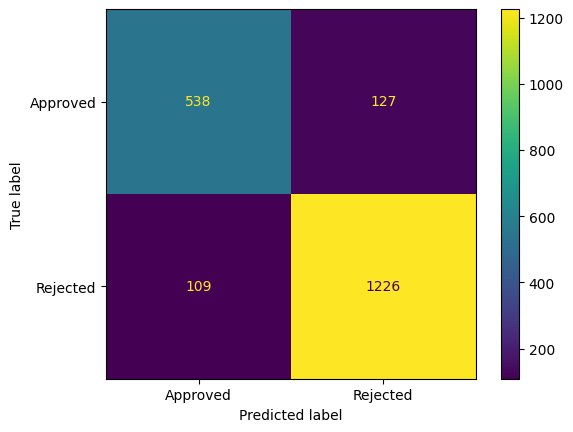

In [137]:
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Approved","Rejected"])

cm_disp.plot()

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [58]:
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [ 30,40],
    'min_child_weight': [0.5, 1],
    'gamma': [0.0, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [59]:


optimal_params= GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', # Use the class directly
                               seed=42,
                               subsample=0.9,
                               colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

In [60]:
optimal_params.fit(X_train,
                  y_train,
                  #'eval_metric': 'auc',
                  verbose=False,
                  eval_set=[(X_test, y_test)]
                  )
print(optimal_params.best_params_)

{'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 40, 'subsample': 0.8}


In [69]:
model = XGBClassifier(max_depth=5 , n_estimators=40,learning_rate=0.1,min_child_weight=1,subsample= 0.8,gamma=0.5,colsample_bytree=1 )

In [74]:
clf_xgb=XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=4,
                          reg_lambda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-logloss:0.57870
[1]	validation_0-logloss:0.51651
[2]	validation_0-logloss:0.47594
[3]	validation_0-logloss:0.39288
[4]	validation_0-logloss:0.37697
[5]	validation_0-logloss:0.34415
[6]	validation_0-logloss:0.32557


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	validation_0-logloss:0.31913
[8]	validation_0-logloss:0.31508
[9]	validation_0-logloss:0.30483
[10]	validation_0-logloss:0.29796
[11]	validation_0-logloss:0.29595
[12]	validation_0-logloss:0.29279
[13]	validation_0-logloss:0.29054
[14]	validation_0-logloss:0.28886
[15]	validation_0-logloss:0.28455
[16]	validation_0-logloss:0.28393
[17]	validation_0-logloss:0.28324
[18]	validation_0-logloss:0.28318
[19]	validation_0-logloss:0.28264
[20]	validation_0-logloss:0.28264
[21]	validation_0-logloss:0.28241
[22]	validation_0-logloss:0.28145
[23]	validation_0-logloss:0.28000
[24]	validation_0-logloss:0.28020
[25]	validation_0-logloss:0.28075
[26]	validation_0-logloss:0.27975
[27]	validation_0-logloss:0.27943
[28]	validation_0-logloss:0.27847
[29]	validation_0-logloss:0.27798
[30]	validation_0-logloss:0.27726
[31]	validation_0-logloss:0.27675
[32]	validation_0-logloss:0.27593
[33]	validation_0-logloss:0.27602
[34]	validation_0-logloss:0.27662
[35]	validation_0-logloss:0.27731
[36]	validation_0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [75]:
from sklearn.metrics import classification_report
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("O" * 50)
print('roc_auc_score ',roc_auc_score(y_test, y_pred))
print('f1_score ',f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       665
           1       0.92      0.91      0.91      1335

    accuracy                           0.88      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.88      0.88      0.88      2000

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
roc_auc_score  0.8716003491875757
f1_score  0.9127163280662153


In [76]:
predictions1 = clf_xgb.predict(X_test)
print(predictions1)

[0 1 1 ... 1 1 1]


In [77]:
cm = confusion_matrix(y_test, predictions1, labels=xgb.classes_)
print(cm)

[[ 426  239]
 [  39 1296]]


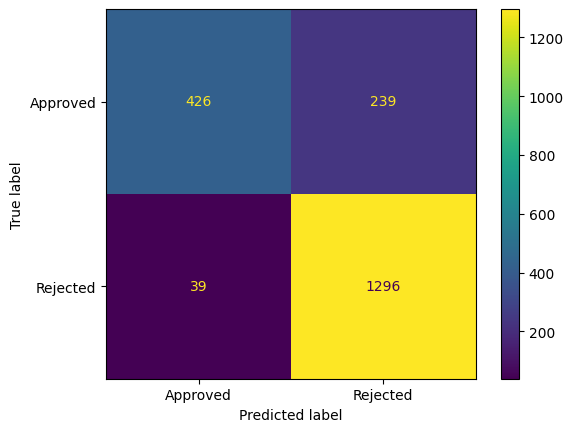

In [78]:
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Approved","Rejected"])

cm_disp.plot()

In [138]:
# Get the feature names the model was trained on
training_features = xgb.get_booster().feature_names

# Check for missing columns
missing_features = set(training_features) - set(X_test_encoded.columns)
if missing_features:
    print("Warning: The following features are missing in X_test_encoded:", missing_features)

# Handle missing features (replace with 0 or mean, for example)
for feature in missing_features:
    X_test_encoded[feature] = 0  # Or another appropriate imputation strategy

# Select only the features the model was trained on
X_test_aligned = X_test_encoded[training_features]

# Now predict using the aligned data
y_pred_goal = xgb.predict(X_test_aligned)
print(y_pred_goal)

<ipython-input-138-6d9c2a9f1dc2>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_encoded[feature] = 0  # Or another appropriate imputation strategy
<ipython-input-138-6d9c2a9f1dc2>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_encoded[feature] = 0  # Or another appropriate imputation strategy
<ipython-input-138-6d9c2a9f1dc2>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

[1 1 1 ... 0 1 1]


In [139]:
tt1['Application Status'] = y_pred_goal
tt1['Application Status'] = tt1['Application Status'].replace({1: 'APPROVED', 0: 'DECLINED'})
sub_df = tt1[[ 'UID','Application Status']].copy()
sub_df.to_csv('submission.csv', index=False)

In [140]:
import os
os.listdir('/content/')

['.config',
 'Assignment_Test.csv',
 'submission.csv',
 'catboost_info',
 'Assignment_Train.csv',
 'sample_data']

In [142]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>